Hanoi Graph constructed successfully.

Nodes: 27, Edges: 39

Adjacency Matrix:
 [[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0

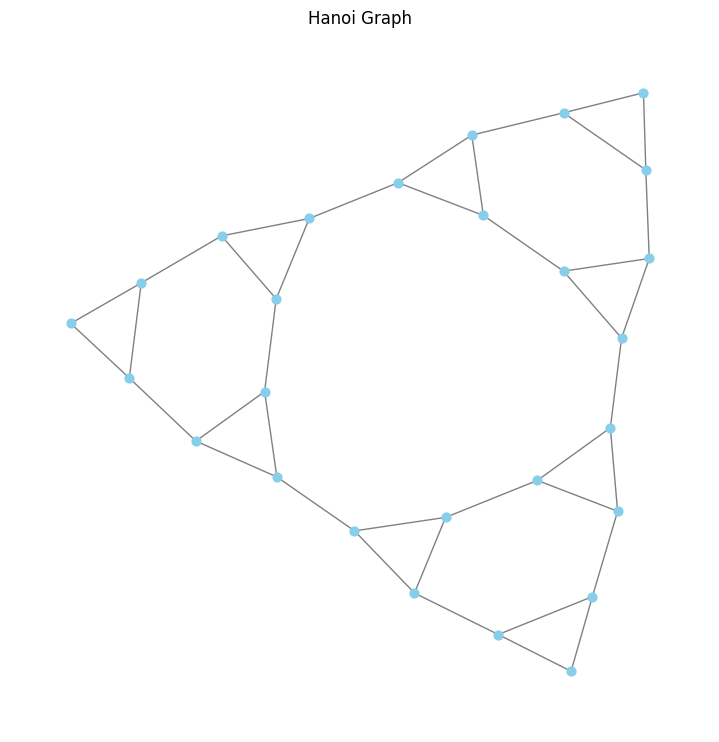

In [33]:
## Following is the Python code for the Hanoi Tower Graph and matices computations

import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product
from sympy import Matrix

# ------------------------------
# 1. Hanoi Tower Graph Generator
# ------------------------------
class HanoiTower:
    def __init__(self, disks, towers):
        self.disks = disks
        self.towers = towers
        self.nums = ''.join(str(i) for i in range(1, towers + 1))
        self.nodes = product(self.nums, repeat=disks)
        self.graph = nx.Graph()

    def diff_count(self, a, b):
        return sum(i != j for i, j in zip(a, b))

    def create_graph(self):
        for node in self.nodes:
            self.graph.add_node(''.join(node))
        for first in self.graph.nodes:
            for second in self.graph.nodes:
                if self.diff_count(first, second) == 1:
                    f_lst, s_lst = list(first), list(second)
                    for i, num in enumerate(f_lst):
                        # valid move check (no two same disks on one tower)
                        if num not in f_lst[i + 1:] and s_lst[i] != num and s_lst[i] not in s_lst[i + 1:]:
                            self.graph.add_edge(first, second)
                            break
        return self.graph

# ------------------------------
# 2. Compute matrices and properties
# ------------------------------
def compute_all_properties(G):
    A = nx.to_numpy_array(G, dtype=float)
    n = len(G)
    degrees = [d for _, d in G.degree()]
    D = np.diag(degrees)
    L = D - A
    Q = D + A

    # --- Display info ---
    print(f"\nNodes: {n}, Edges: {G.number_of_edges()}")
    print("\nAdjacency Matrix:\n", A)
    print("\nDegree Matrix:\n", D)
    print("\nLaplacian Matrix:\n", L)
    print("\nSignless Laplacian Matrix:\n", Q)

    # --- Helper for eigenvalues & energy ---
    def spectral_energy(M, name):
        eigvals = np.linalg.eigvals(M)
        energy = np.sum(np.abs(eigvals))
        sorted_eigs = np.sort(eigvals)[::-1]
        print(f"\n{name} Eigenvalues:\n", eigvals)
        print(f"{name} Energy: {energy}")
        return eigvals, energy

    eigA, energyA = spectral_energy(A, "Adjacency")
    eigL, energyL = spectral_energy(L, "Laplacian")
    eigQ, energyQ = spectral_energy(Q, "Signless Laplacian")

    # --- Distance matrix ---
    dist_matrix = np.array(nx.floyd_warshall_numpy(G), dtype=float)
    print("\nDistance Matrix:\n", dist_matrix)
    eigD, energyD = spectral_energy(dist_matrix, "Distance")

    # --- Seidel matrix ---
    seidel = np.where(A == 1, -1, 1)
    np.fill_diagonal(seidel, 0)
    print("\nSeidel Matrix:\n", seidel)
    eigS, energyS = spectral_energy(seidel, "Seidel")

    # --- Arithmetic-Geometric matrix ---
    AG = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if A[i, j] == 1:
                AG[i, j] = (degrees[i] + degrees[j]) / (2 * np.sqrt(degrees[i] * degrees[j]))
    print("\nArithmetic-Geometric Matrix:\n", AG)
    eigAG, energyAG = spectral_energy(AG, "Arithmetic-Geometric")

    # --- Zagreb matrices ---
    Z1 = np.zeros((n, n))
    Z2 = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if A[i, j] == 1:
                Z1[i, j] = degrees[i] + degrees[j]
                Z2[i, j] = degrees[i] * degrees[j]
    print("\nFirst Zagreb Matrix:\n", Z1)
    eigZ1, energyZ1 = spectral_energy(Z1, "First Zagreb")
    print("\nSecond Zagreb Matrix:\n", Z2)
    eigZ2, energyZ2 = spectral_energy(Z2, "Second Zagreb")

    # --- Atom-Bond Connectivity (ABC) matrix ---
    ABC = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if A[i, j] == 1:
                val = (degrees[i] + degrees[j] - 2) / (degrees[i] * degrees[j])
                val = max(val, 0)
                ABC[i, j] = np.sqrt(val)
    print("\nAtom-Bond Connectivity (ABC) Matrix:\n", ABC)
    eigABC, energyABC = spectral_energy(ABC, "ABC (Atom-Bond Connectivity)")

    # --- Summary ---
    print("\n--- ENERGY SUMMARY ---")
    print(f"Adjacency Energy: {energyA}")
    print(f"Laplacian Energy: {energyL}")
    print(f"Signless Laplacian Energy: {energyQ}")
    print(f"Distance Energy: {energyD}")
    print(f"Seidel Energy: {energyS}")
    print(f"Arithmetic-Geometric Energy: {energyAG}")
    print(f"First Zagreb Energy: {energyZ1}")
    print(f"Second Zagreb Energy: {energyZ2}")
    print(f"ABC Energy: {energyABC}")

    return {
        "A": A, "D": D, "L": L, "Q": Q, "Distance": dist_matrix,
        "Seidel": seidel, "AG": AG, "Z1": Z1, "Z2": Z2, "ABC": ABC
    }

# ------------------------------
# 3. Visualization
# ------------------------------
def draw_graph(G):
    pos = nx.kamada_kawai_layout(G)
    plt.figure(figsize=(7, 7))
    nx.draw(G, pos, node_size=40, edge_color="gray", node_color="skyblue", with_labels=False)
    plt.axis("off")
    plt.title("Hanoi Graph")
    plt.show()


# ------------------------------
# MAIN
# ------------------------------
if __name__ == "__main__":
    hanoi = HanoiTower(disks=3, towers=3)   # use (4,3) if you want larger, but it’s big
    G = hanoi.create_graph()
    print("Hanoi Graph constructed successfully.")
    matrices = compute_all_properties(G)
    draw_graph(G)
